In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.DataFrame(json.load(open('../data/score_df.json','r')))
# calculate pca
pca = PCA(n_components=3, svd_solver='arpack')
pca.fit(df.iloc[:,:5].T)  # we're only using the parameters

PCA(n_components=3, svd_solver='arpack')

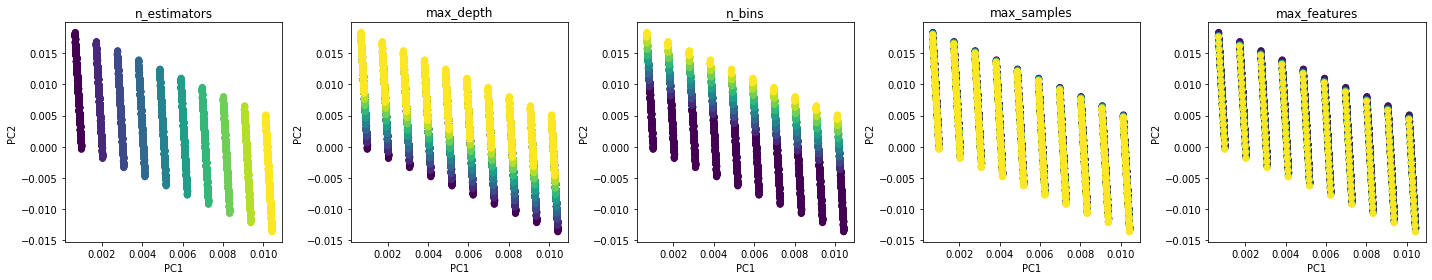

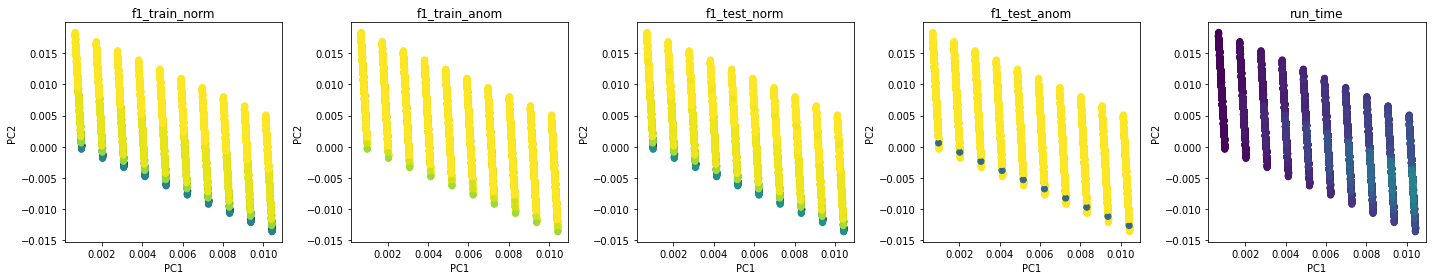

In [3]:
# per param
fig = plt.figure(figsize=[20,4])
idx = 1
for param in ['n_estimators','max_depth','n_bins','max_samples','max_features']:
    ax = fig.add_subplot(1, 5, idx)
    ax.scatter(pca.components_[0], pca.components_[1], c=df[param])
    ax.set(xlabel='PC1', ylabel='PC2', title=param)
    idx += 1
fig.tight_layout()

# per metric
fig = plt.figure(figsize=[20,4])
idx = 1
for metric in ['f1_train_norm','f1_train_anom','f1_test_norm','f1_test_anom','run_time']:
    ax = fig.add_subplot(1, 5, idx)
    ax.scatter(pca.components_[0], pca.components_[1], c=df[metric])
    ax.set(xlabel='PC1', ylabel='PC2', title=metric)
    idx += 1
fig.tight_layout()


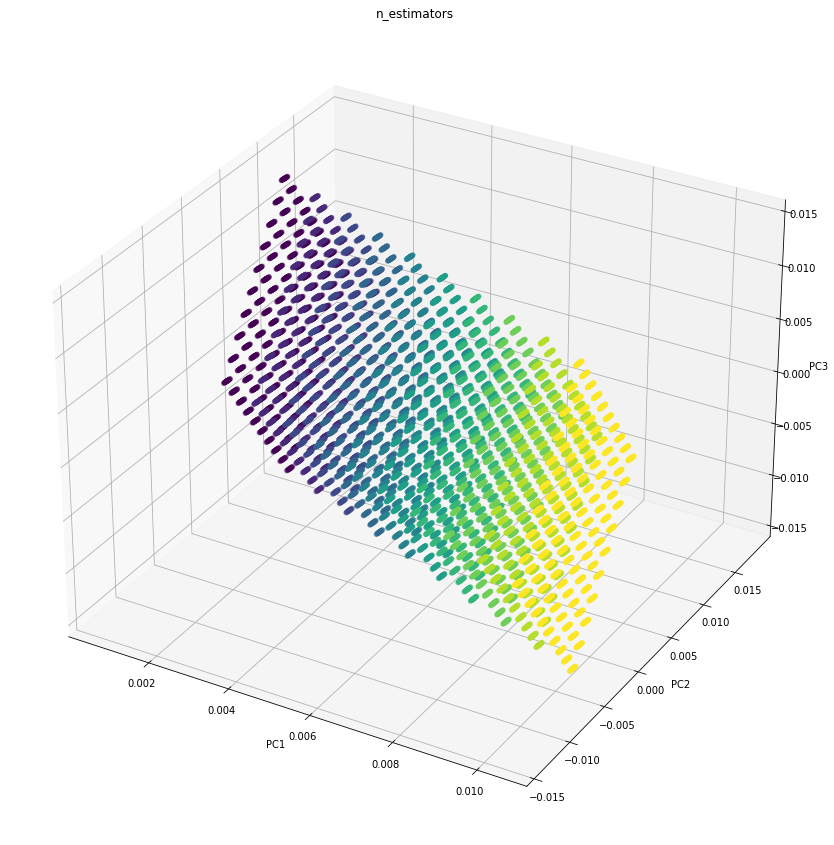

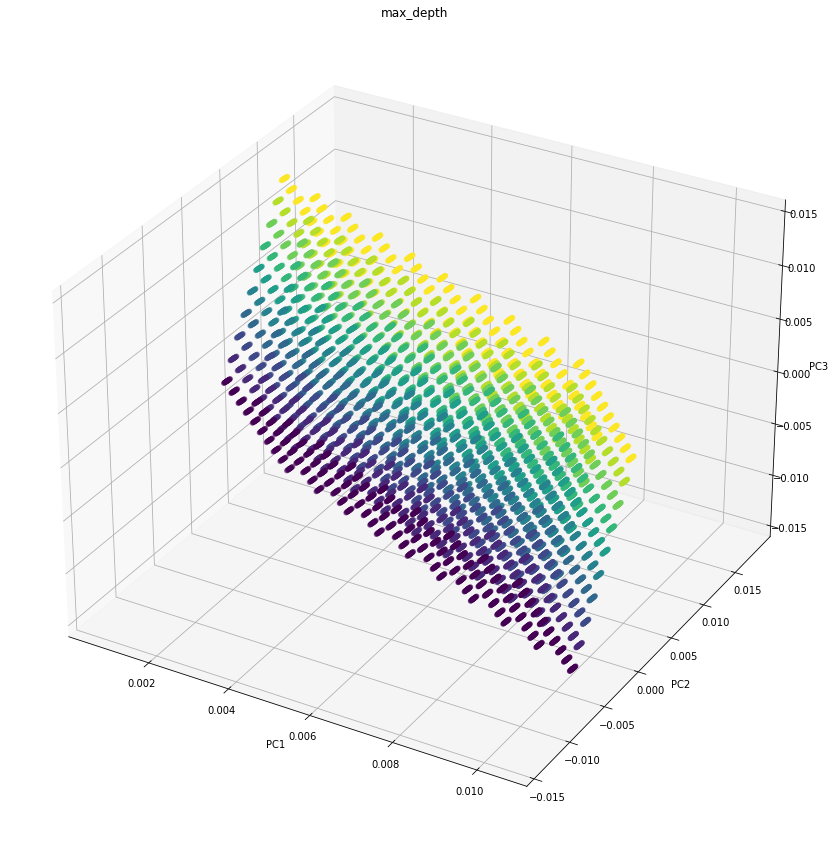

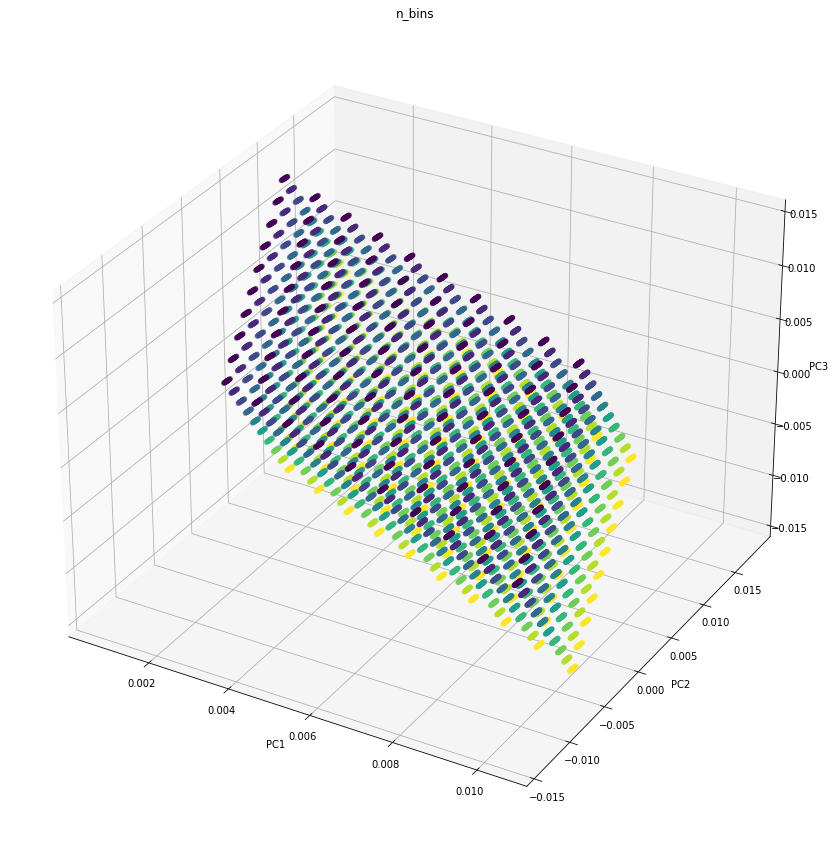

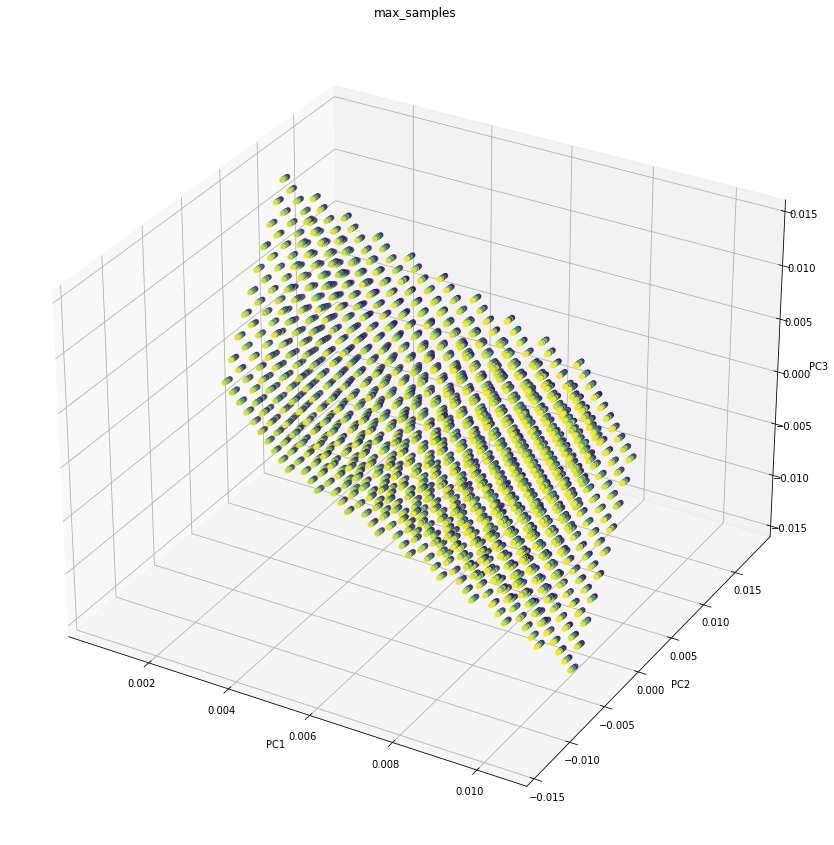

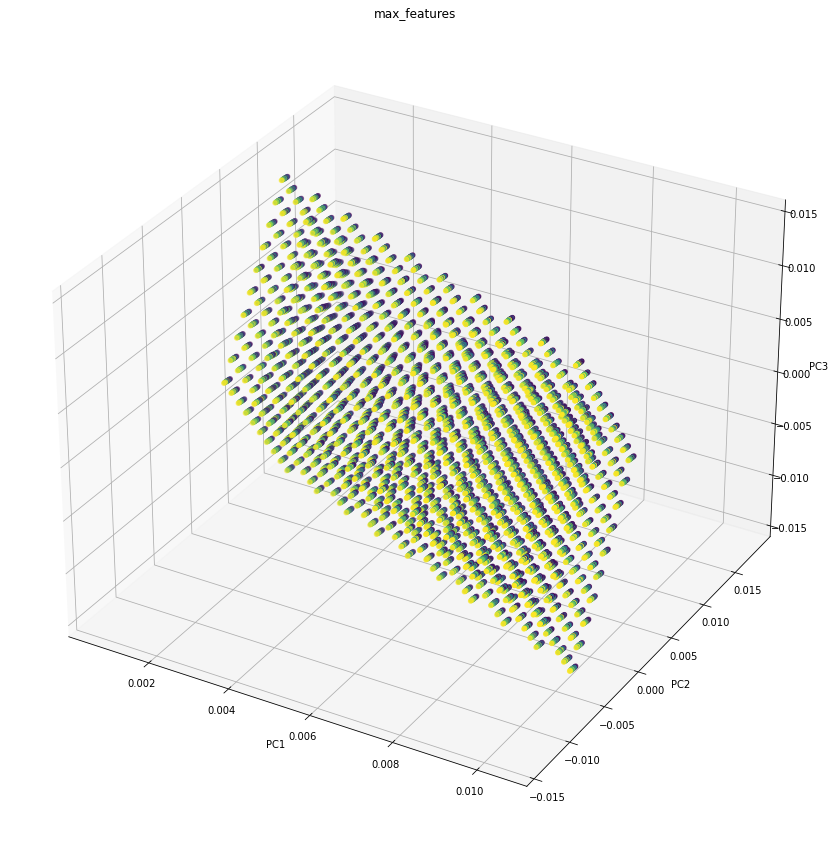

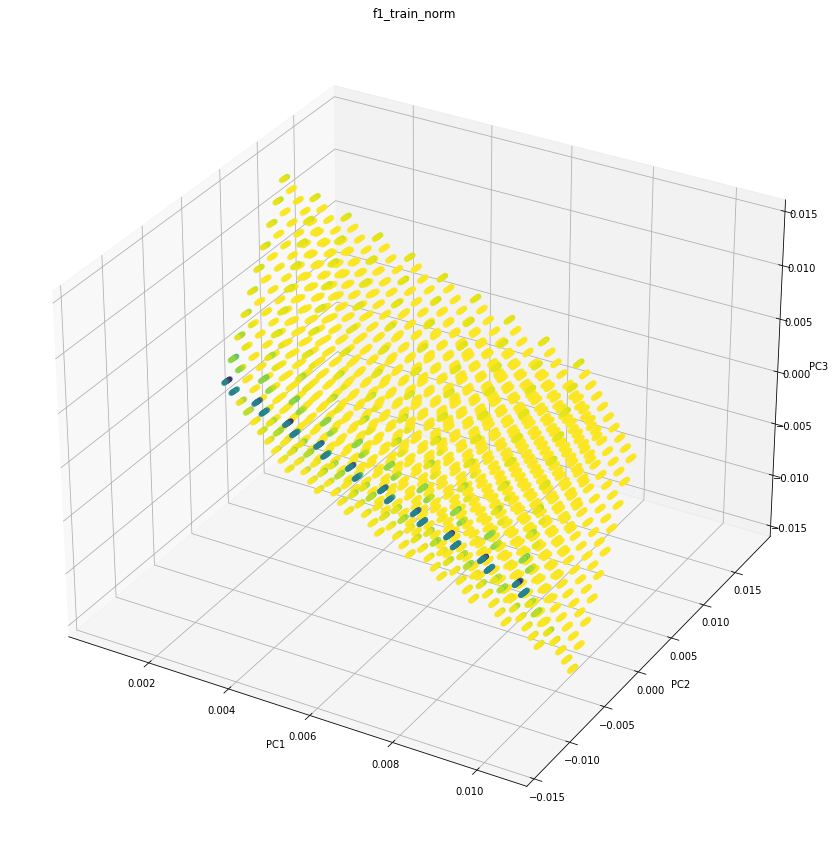

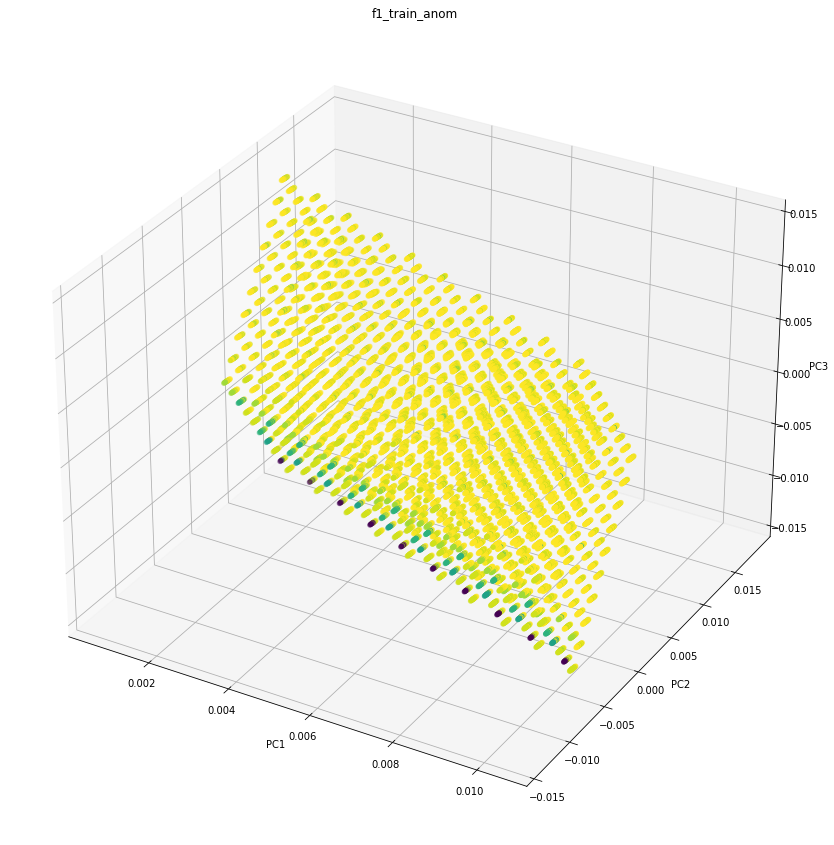

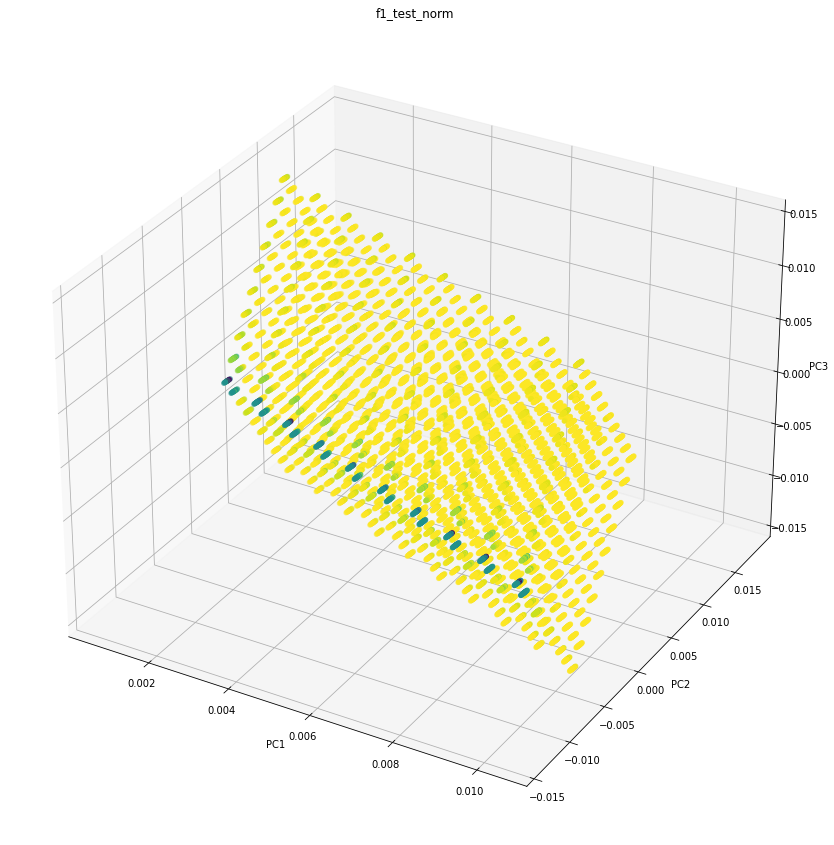

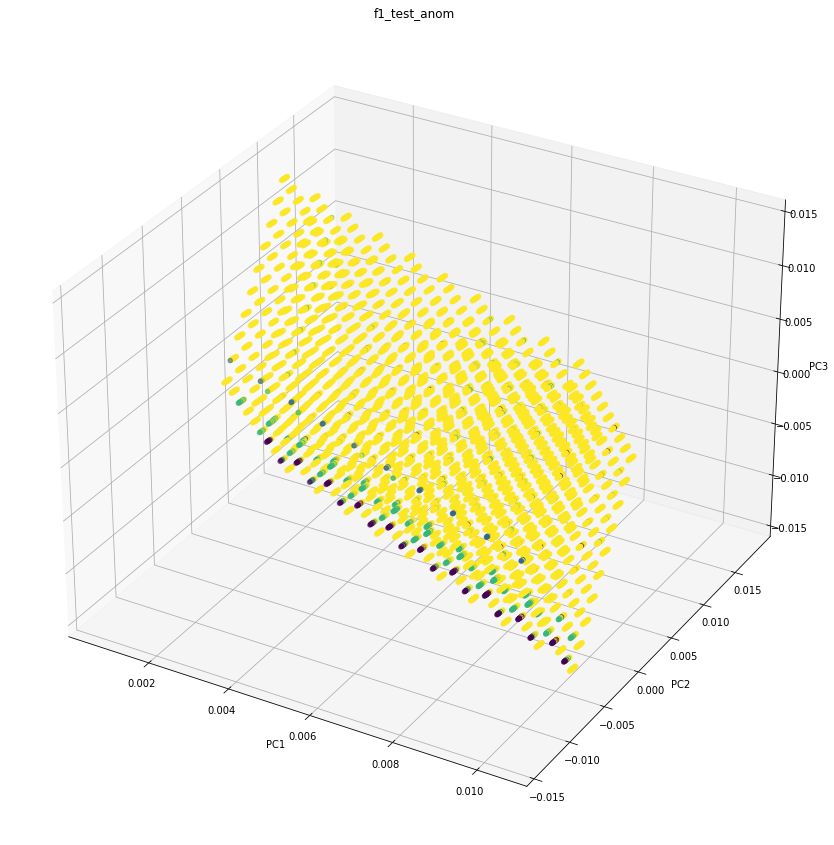

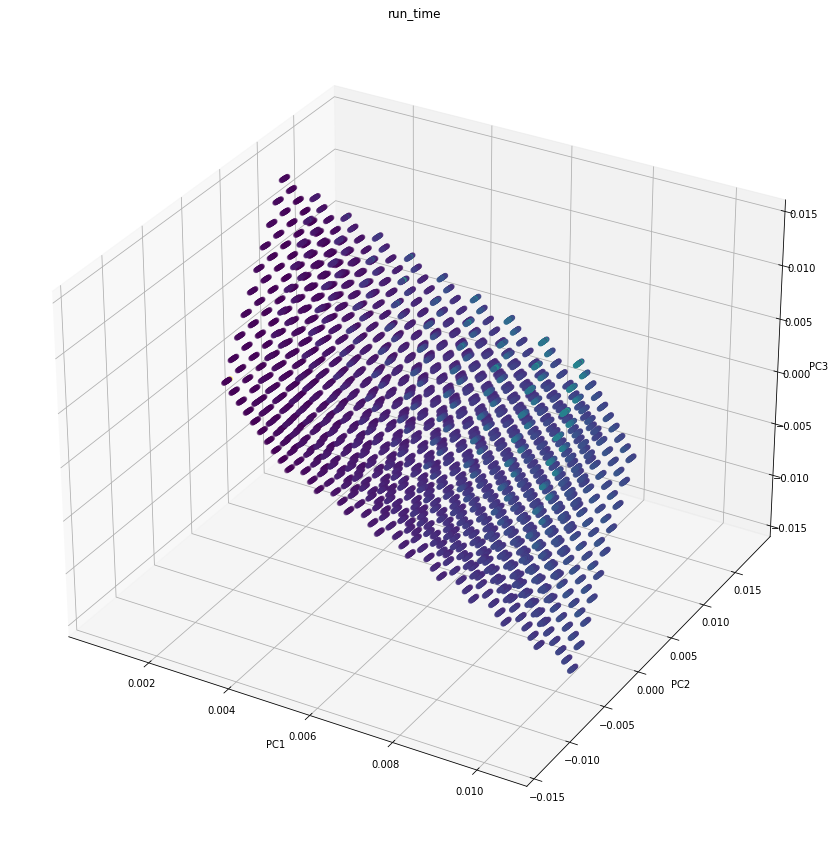

In [4]:
# per param
for metric in ['n_estimators','max_depth','n_bins','max_samples','max_features']:
    fig = plt.figure(figsize=[15,15])
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pca.components_[0], pca.components_[1], pca.components_[2], c=df[metric])
    ax.set(xlabel='PC1', ylabel='PC2', zlabel='PC3', title=metric)
    
# per metric
for metric in ['f1_train_norm','f1_train_anom','f1_test_norm','f1_test_anom','run_time']:
    fig = plt.figure(figsize=[15,15])
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pca.components_[0], pca.components_[1], pca.components_[2], c=df[metric])
    ax.set(xlabel='PC1', ylabel='PC2', zlabel='PC3', title=metric)
    

In [5]:
# subset for perfect runs
score_cols = ['f1_train_norm','f1_train_anom','f1_test_norm','f1_test_anom']
df_top = df[(df[score_cols] == 1.0).all(1)].sort_values('run_time')


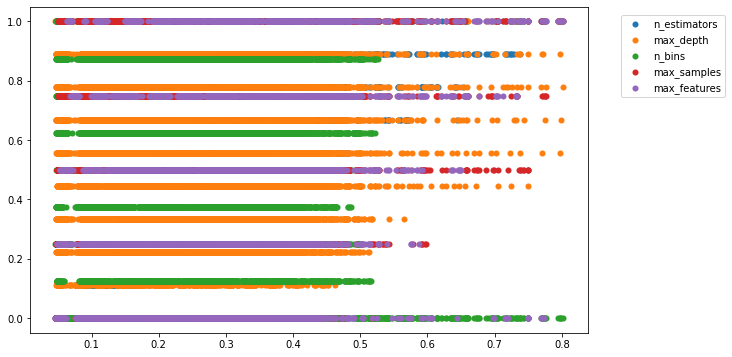

In [6]:
param_cols = ['n_estimators','max_depth','n_bins','max_samples','max_features']
fig,ax = plt.subplots(figsize=[10,6])
for col in param_cols:
    df_top[col] -= df_top[col].min()
    df_top[col] /= df_top[col].max()
    ax.scatter(df_top['run_time'], df_top[col], linewidth=0.05, label=col)
ax.legend(bbox_to_anchor=(1.05,0.99))

In [8]:
df_top.sort_values(param_cols)

,n_estimators,max_depth,n_bins,max_samples,max_features,run_time,f1_train_norm,f1_train_anom,f1_test_norm,f1_test_anom
176,0.0,0.000000,0.750,0.00,0.25,0.048117,1.0,1.0,1.0,1.0
226,0.0,0.000000,1.000,0.00,0.25,0.050583,1.0,1.0,1.0,1.0
305,0.0,0.111111,0.125,0.25,0.00,0.048457,1.0,1.0,1.0,1.0
310,0.0,0.111111,0.125,0.50,0.00,0.049640,1.0,1.0,1.0,1.0
315,0.0,0.111111,0.125,0.75,0.00,0.050488,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
24995,1.0,1.000000,1.000,1.00,0.00,0.478398,1.0,1.0,1.0,1.0
24996,1.0,1.000000,1.000,1.00,0.25,0.414240,1.0,1.0,1.0,1.0
24997,1.0,1.000000,1.000,1.00,0.50,0.436336,1.0,1.0,1.0,1.0
24998,1.0,1.000000,1.000,1.00,0.75,0.455202,1.0,1.0,1.0,1.0


In [ ]:
carbon_savings = 25.0,2.0,20.0,0.2,0.4
carbon_intensive = 250,20.0,20.0,1.0,0.4